# IST 371 Machine Learning

## Spring 2019

### Chapter 6 homework

#### Alex Lange, Aidan Polivka


In this assignment, you will train a Decision Tree Regressor to predict the expected high temperature for Crete, NE, given the day of the year (January 1st = 1, January 2nd = 2, ..., December 31st = 365). The input data is the recorded daily maximum and minimum temperatures for Crete, for every day since January 1st, 1919. 

In [11]:
# read the crete-temps.csv file as a Pandas dataframe,
# and display the data

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Magic words
%matplotlib inline

#Read the csv file
tempfile = pd.read_csv("crete-temps.csv")


In [12]:
# view the dataframe's .info()
tempfile.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35735 entries, 0 to 35734
Data columns (total 4 columns):
DATE    35735 non-null object
DOY     35735 non-null int64
TMAX    35735 non-null int64
TMIN    35735 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.1+ MB


In [13]:
# likewise for .describe()
tempfile.describe()


,DOY,TMAX,TMIN
count,35735.000000,35735.000000,35735.000000
mean,182.572744,63.547418,40.883532
std,105.707862,22.183148,20.353142
min,1.000000,-9.000000,-25.000000
25%,91.000000,46.000000,26.000000
50%,182.000000,66.000000,41.000000
75%,274.000000,82.000000,59.000000
max,365.000000,114.000000,88.000000


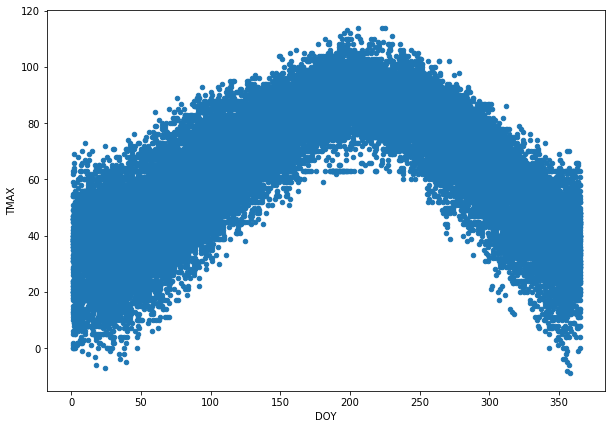

In [55]:
# produce and examine the scatter matrices for the numeric fields
# in the dataframe

#Quick Scatter Plot
tempfile.plot(kind='scatter', x="DOY", y='TMAX', figsize=(10,7))

In [41]:
# Select X as the DOY feature, and y as the TMAX feature
# (make sure to convert to Numpy arrays, and reshape if
# necessary)


#WE NEED TO CONVERT TO NUMPY ARRAYS
X = tempfile['DOY'] 
y = tempfile['TMAX']

#I'm not gonna lie I think this is the code I need to fix my older assignments
#We have to reshape the 1d arrays to 2d arrays to do out DecisionTreeRegressor
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

In [51]:
# train a decision tree regressor to fit the data.
# constrain the model to prevent overfitting
#Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=3, random_state=68333)

#Fit that data

#           __  _
#    .-.'  `; `-._  __  _
#   (_,         .-:'  `; `-._
# ,'o"(        (_,           )
#(__,-'      ,'o"(            )>
#   (       (__,-'            )
#    `-'._.--._(             )
#       |||  |||`-'._.--._.-'
#                  |||  |||
#
#           Two Ewes


tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=68333, splitter='best')

In [56]:
# using code from the chapter 6 sample, export 
# the decision tree
#
# You will need to install the Graphvis utility to 
# convert from .dot to a viewable format such as 
# .png

from sklearn.tree import export_graphviz
export_graphviz(
    tree_reg,
    out_file='./reg_tree.dot',
    rounded=True,
    filled=False
)


## Decision tree visualization

Edit this Markdown to display your decision tree in the notebook. (NOTE -- if the tree is really, really huge, you may wish to constrain your model a bit more! Page 171)

![decision tree](./your_tree2.png)

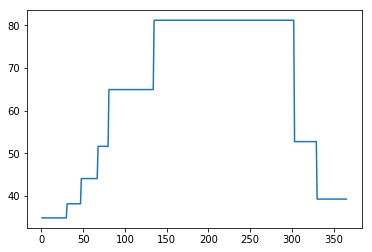

In [54]:
# Use this code to visualize the predictions made by
# your model

# the numbers 1 through 365
X_test = np.linspace(1,365,365).reshape(-1, 1)

# predictions for your model (edit if your model
# has a different name)
y_test = tree_reg.predict(X_test)

# display predictions as a plot
plt.plot(X_test, y_test)
plt.show()